In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/mushrooms.csv')

In [37]:
df.shape

(8124, 23)

In [38]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [40]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [41]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [43]:
X = df.drop(columns='class')
y = df['class']

In [44]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [45]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(y)

In [47]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [48]:
np.unique(y)

array([0, 1])

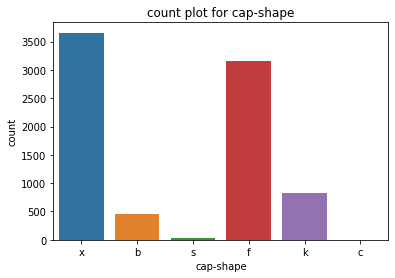

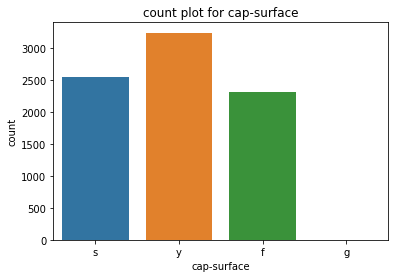

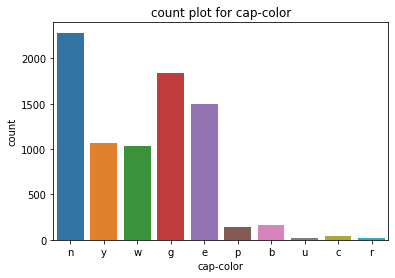

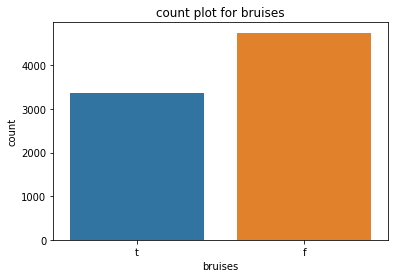

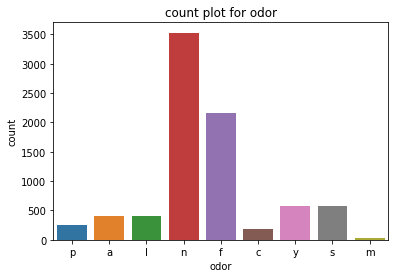

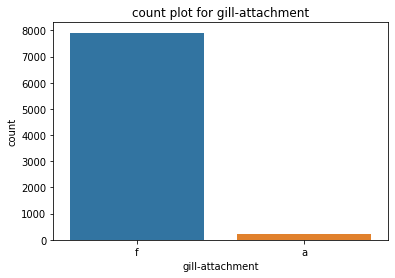

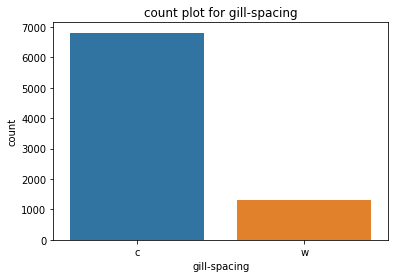

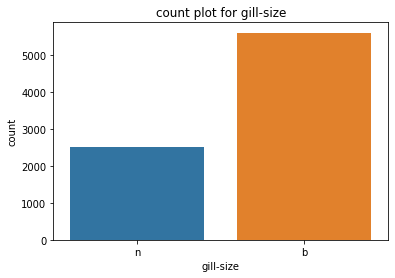

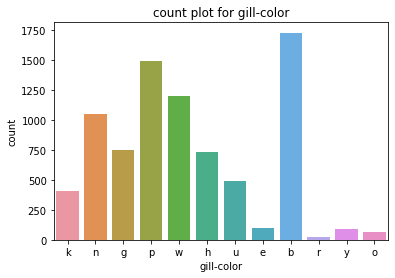

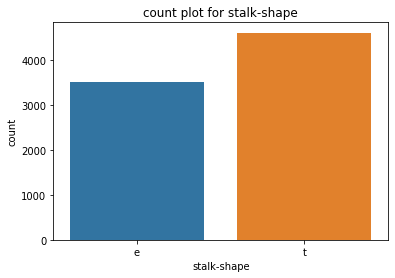

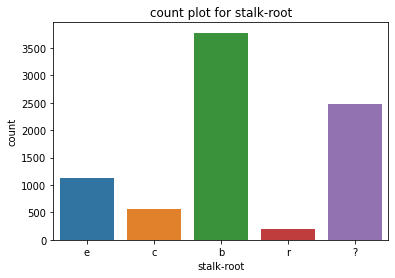

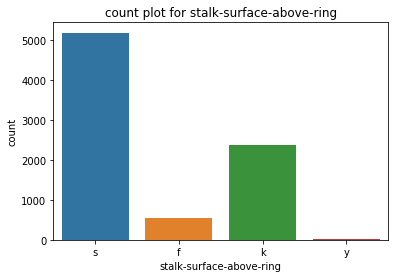

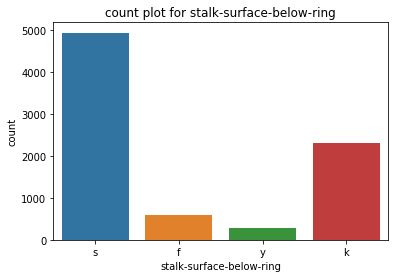

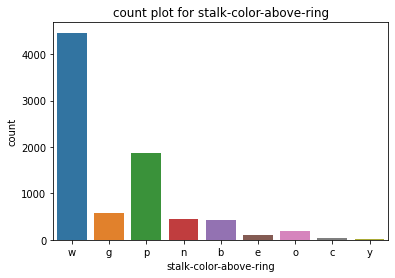

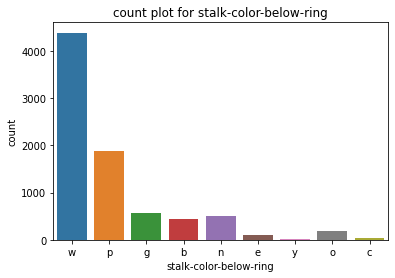

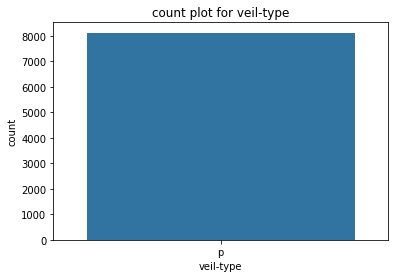

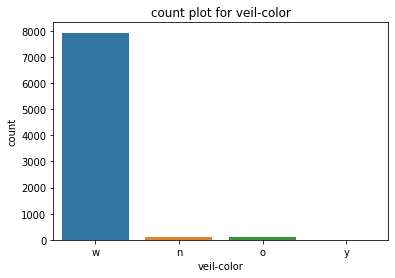

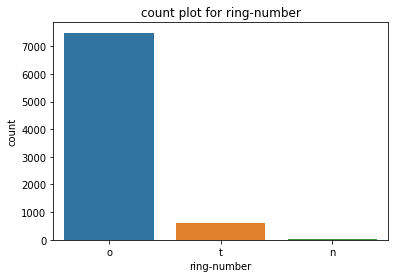

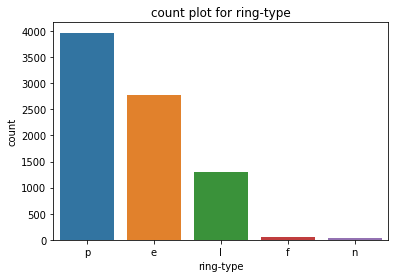

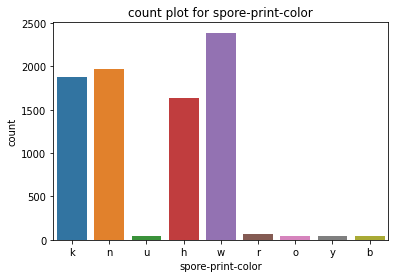

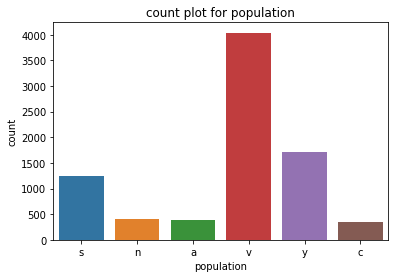

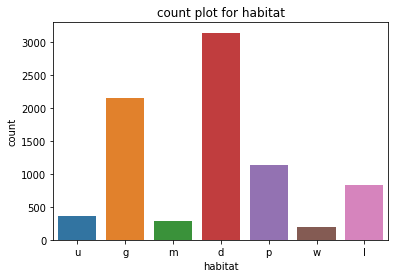

--------------------------------------------------


In [49]:
for col in X:
    sns.countplot(data=df,x=col)
    plt.title(f"count plot for {col}")
    plt.show()

print('-'*50)

In [50]:
# Feature Selection

from scipy.stats import chi2_contingency

significant_columns = {}

for col in X.columns:
    contengency_table = pd.crosstab(df['class'],df[col])

    chi2_stat,p_val,dof,expected = chi2_contingency(contengency_table)

    if p_val < 0.05:
        significant_columns[col] = {
            'chi2_stat': chi2_stat,
            'p_val': p_val
        }

    print(f"{col}-chi2_stat:{chi2_stat:.3f},p_val:{p_val:.3f}")

print(significant_columns.keys())


cap-shape-chi2_stat:489.920,p_val:0.000
cap-surface-chi2_stat:315.043,p_val:0.000
cap-color-chi2_stat:387.598,p_val:0.000
bruises-chi2_stat:2041.416,p_val:0.000
odor-chi2_stat:7659.727,p_val:0.000
gill-attachment-chi2_stat:133.986,p_val:0.000
gill-spacing-chi2_stat:984.143,p_val:0.000
gill-size-chi2_stat:2366.834,p_val:0.000
gill-color-chi2_stat:3765.714,p_val:0.000
stalk-shape-chi2_stat:84.142,p_val:0.000
stalk-root-chi2_stat:1344.441,p_val:0.000
stalk-surface-above-ring-chi2_stat:2808.286,p_val:0.000
stalk-surface-below-ring-chi2_stat:2684.474,p_val:0.000
stalk-color-above-ring-chi2_stat:2237.898,p_val:0.000
stalk-color-below-ring-chi2_stat:2152.391,p_val:0.000
veil-type-chi2_stat:0.000,p_val:1.000
veil-color-chi2_stat:191.224,p_val:0.000
ring-number-chi2_stat:374.737,p_val:0.000
ring-type-chi2_stat:2956.619,p_val:0.000
spore-print-color-chi2_stat:4602.033,p_val:0.000
population-chi2_stat:1929.741,p_val:0.000
habitat-chi2_stat:1573.777,p_val:0.000
dict_keys(['cap-shape', 'cap-surface

In [51]:
updated_col = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [52]:
X = df[updated_col]

In [53]:
X.shape

(8124, 21)

In [54]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [55]:
# Define Preprocessing Pipeline

cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',sparse=False))
])


In [56]:
preprocess_col = ColumnTransformer([
    ('cat_preprocess',cat_pipeline,updated_col)
])

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
X_train.shape

(6499, 21)

In [59]:
X_train_prprocessed = preprocess_col.fit_transform(X_train)
X_test_preprocessed = preprocess_col.transform(X_test)

In [60]:
input_shape = X_test_preprocessed.shape[1]

In [61]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                6144      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 8,257
Trainable params: 8,257
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [65]:
history = model.fit(
    X_train_prprocessed,y_train,
    epochs=100,
    batch_size=32,
    validation_split = 0.2,
    callbacks = [early_stopping],
    verbose=1
)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 0.2051 - accuracy: 0.9309 - val_loss: 0.0305 - val_accuracy: 0.9931
Epoch 2/100
163/163 [==============================] - 0s 981us/step - loss: 0.0186 - accuracy: 0.9963 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9977
Epoch 4/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.4755e-04 - val_accuracy: 1.0000
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 8.9962e-04 - accuracy: 1.0000 - val_loss: 4.0130e-04 - val_ac

In [66]:
y_pred_proba = model.predict(X_test_preprocessed)
y_pred = (y_pred_proba > 0.5).astype(int)

In [67]:
y_pred_proba

array([[1.201604e-10],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00]], dtype=float32)

In [68]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [69]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
clf_report = classification_report(y_test,y_pred)

In [70]:
print(f"Accuracy:{accuracy}")
print(f"Confusion Maxtrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report}")

Accuracy:1.0
Confusion Maxtrix:
[[843   0]
 [  0 782]]
Classification Report:
<function classification_report at 0x7f46253e7488>


In [71]:
import joblib

model.save('ann_mushrom.h5')
joblib.dump(preprocess_col,'mushroom.pkl')

['mushroom.pkl']

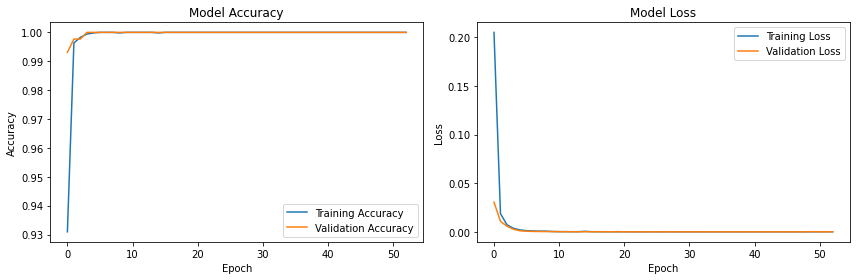

In [72]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
